## CS 5180: Information Retrieval Project 1 Parts (3 & 4)
Directory paths need to be adjusted corresponding to user's environment.

In [1]:
import nltk
import matplotlib
import matplotlib.pyplot as plt
import os
from PIL import ImageFont

In [2]:
def getTotalWordCount(words: list) -> int:
    return (len(words))

def getDistinctWordCount(words: list) -> int:
    distinct_words = {}
    for i in range(len(words)):
        if words[i] not in distinct_words:
            distinct_words[words[i]] = 0
        distinct_words[words[i]] += 1
    return (len(distinct_words))

In [3]:
# path - directory
# lang - the language types: en, es, & ch
def getWords(path: str, lang: str) -> list:
    # original file opening function
    file = open(path, encoding="utf-8")
    
    text = file.read()
    file.close()
    
    # split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    
    # strip tokens of unecessary symbols & lower case all tokens
    excess = '_*~`@'
    tokens = [token.strip(excess) for token in tokens]
    tokens = [token.lower() for token in tokens]

    # chinese(ch) is the only language exception for processing
    if lang == 'ch':
        return tokens
    
    # remove all tokens that are not alphabetic (for other languages)
    words = [word for word in tokens if word.isalpha()]
    
    return words

In [4]:
# directory - path
def get_html_files(directory) -> list:
    paths = []
    for filename in os.listdir(directory):
        if filename.endswith('.html') or filename.endswith('.txt'):
            paths.append(os.path.join(directory, filename))
    return paths

In [7]:
# Returns x & y values for graph plotting
# paths - list of directories
# lang - language types: en, es, & ch
def getValuesForProcessedWords(paths: list, lang: str) -> list:
    graphValues = []
    for i in range(len(paths)):
        # get the English words
        wordList = getWords(paths[i], lang)
        # get the values for the Heap's law graph
        distinctValue = getDistinctWordCount(wordList)
        totalValue = getTotalWordCount(wordList)
        graphValues.append((distinctValue, totalValue))

    return graphValues

# Part3:
Go through file and count distinct words and total word counts
Plot x & y graph of the distinct words vs. total word counts

In [9]:
# for plotting xy graph
# paths - list of directories
# limit - the max range to include in graph (used to ignore outliers)
def plotGraph(paths: list, lang: str, limit: int) -> None:
    graphValues = getValuesForProcessedWords(paths, lang)
    # distinct words in vocab
    yValues = []
    # total words in collection
    xValues = []
    
    for i in range(len(graphValues)):
        if graphValues[i][1] <= limit: # this is the x axis value
            yValues.append(graphValues[i][0])
            xValues.append(graphValues[i][1])

    plt.plot([xValues],[yValues],'ro')
    plt.xlabel('total words in collection', fontsize=15)
    plt.ylabel('distinct words in vocab', fontsize=15)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

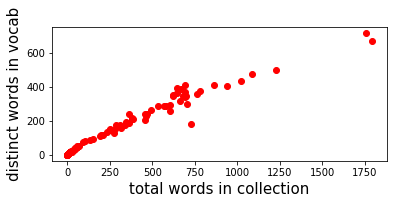

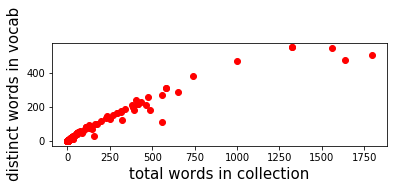

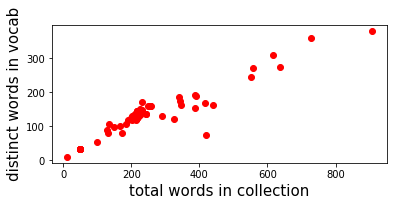

In [10]:
limit = 2500

# produce graphs to see if Heap's law is present
paths = r'C:\Users\Johnson\Desktop\5180\project1\html_files\en'
en_paths = get_html_files(paths)
plotGraph(en_paths, 'en', limit)

paths = r'C:\Users\Johnson\Desktop\5180\project1\html_files\es'
es_paths = get_html_files(paths)
plotGraph(es_paths, 'es', limit)

paths = r'C:\Users\Johnson\Desktop\5180\project1\html_files\ch'
ch_paths = get_html_files(paths)
plotGraph(ch_paths, 'ch', limit)

### Using the ImageFont module function: getsize
printed values represent (width, height) of font in pixel values.

In [19]:
font = ImageFont.truetype('times.ttf', 12)
en_size = font.getsize(u'views')
ch_size = font.getsize(u'次檢視')
sp_size = font.getsize(u'vistas')
test_size = font.getsize(u'visualizzazioni')
print(en_size)
print(ch_size)
print(sp_size)
print(test_size)

(28, 11)
(27, 11)
(27, 11)
(70, 11)


# Part4:
Go through files and calculate pixel width for each file. 
Get averages of text width.

In [20]:
# words - contains a list of words
def getTextPixelWidth(words: list) -> int:
    word_size = 0
    
    # empty space character is 3px
    empty_space_pixel = 3 
    
    # declare type of font
    font = ImageFont.truetype('times.ttf', 12)
    
    
    for i in range(len(words)):
        new_word_size = font.getsize(words[i])
        word_size += new_word_size[0] + empty_space_pixel
    
    # take out trailing empty space character pixel
    word_size -= empty_space_pixel
    return word_size

In [21]:
# paths - a list of directories
def getAverageTextPixelWidth(paths: list, lang: str) -> float:
    # stores the total px width of each file
    pixel_widths = []
    
    total_files = len(paths)
    
    if total_files == 0:
        raise ValueError('total_files must be greater than 0, otherwise div by 0 can occur')
         
    for i in range(len(paths)):
        word_size = 0
        words = getWords(paths[i], lang)
        pixel_widths.append(getTextPixelWidth(words))
    
    total_sum = 0
    for i in range(len(pixel_widths)):
        total_sum += pixel_widths[i]
    
    return (total_sum / total_files)

In [22]:
# Spanish
paths = r'C:\Users\Johnson\Desktop\5180\project1\html_files\es'
paths = get_html_files(paths)
print(getAverageTextPixelWidth(paths, 'es'))

9724.14393939394


In [23]:
# Chinese
paths = r'C:\Users\Johnson\Desktop\5180\project1\html_files\ch'
paths = get_html_files(paths)
print(getAverageTextPixelWidth(paths, 'ch'))

5031.663157894737


In [24]:
# English
paths = r'C:\Users\Johnson\Desktop\5180\project1\html_files\en'
paths = get_html_files(paths)
print(getAverageTextPixelWidth(paths, 'en'))

14195.901960784313


## Demonstrates comparison between English, Spanish, and Chinese for a small text file.
Results are the pixel width of the entire text passage.

In [26]:
# choose a file from each language with relatively the same file size.
pathEnglish = r'C:\Users\Johnson\Desktop\5180\project1\text_files\sampleEnglish.txt'
pathSpanish = r'C:\Users\Johnson\Desktop\5180\project1\text_files\sampleSpanish.txt'
pathChinese = r'C:\Users\Johnson\Desktop\5180\project1\text_files\sampleChinese.txt'

# print(getWords(pathEnglish))
# print(getWords(pathSpanish))
# print(getChineseWords(pathChinese))

words = getWords(pathChinese, 'ch')
px_width = getTextPixelWidth(words)
print(px_width)

words = getWords(pathEnglish, 'en')
px_width = getTextPixelWidth(words)
print(px_width)

words = getWords(pathSpanish, 'es')
px_width = getTextPixelWidth(words)
print(px_width)

2277
4068
4244
